# Feature Engineering: LDA, Polarity, and Sentiment
## Goal: Generate useful features related to standup comedy style.

## Table of Contents

   - [x] [imports](#imports)
   - [x] [prepare the data](#prepare-the-data)
   - [x] [sentiment analysis with TextBlob](#sentiment-analysis-with-TextBlob)
   - [ ] [sentiment analysis with BERT](#sentiment-analysis-with-BERT)
   - [playground](#playground)

## imports 


In [2]:
import pickle
import numpy as np
import pandas as pd
from datetime import date
import json
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import re
from collections import Counter, defaultdict
import itertools
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
import gensim
from gensim.corpora.dictionary import Dictionary
import spacy

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject


In [3]:
sw = stopwords.words("english")

In [4]:
with open(f'../data/metascripts_df_profanity.pickle', 'rb') as file:
    metascripts = pickle.load(file)

## prepare the data


In [5]:
descriptions = list(metascripts['description'].values)
scripts = list(metascripts['transcript'].values)
scripts_dict = dict(zip(descriptions, scripts))

## sentiment analysis with TextBlob

In [9]:
polarities = [TextBlob(script).sentiment.polarity for script in tqdm(scripts)]

  0%|          | 0/310 [00:00<?, ?it/s]

In [10]:
subjectivity = [TextBlob(script).sentiment.subjectivity for script in tqdm(scripts)]

  0%|          | 0/310 [00:00<?, ?it/s]

In [11]:
metascripts['polarity'] = polarities
metascripts['subjectivity'] = subjectivity

In [20]:
px.box(metascripts, x = 'polarity', hover_data = ['description'], points = 'all')

### polarity and subjectivity by sentence

In [22]:
sent_polarity = [[sentence.sentiment.polarity for sentence in TextBlob(script).sentences] for script in tqdm(scripts)]
sent_subjectivity = [[sentence.sentiment.subjectivity for sentence in TextBlob(script).sentences] for script in tqdm(scripts)]

  0%|          | 0/310 [00:00<?, ?it/s]

  0%|          | 0/310 [00:00<?, ?it/s]

In [24]:
metascripts['mean sentence polarity'] = [np.mean(script_sent_pols) for script_sent_pols in sent_polarity]

for quantile in (0.25, 0.50, 0.75):
    metascripts[f'Q{quantile/0.25} sentence polarity'] = [np.quantile(script_sent_pols, quantile) for script_sent_pols in sent_polarity]

metascripts['std sentence polarity'] = [np.std(script_sent_pols) for script_sent_pols in sent_polarity]

In [25]:
metascripts['mean sentence subjectivity'] = [np.mean(script_sent_subj) for script_sent_subj in sent_subjectivity]

for quantile in (0.25, 0.50, 0.75):
    metascripts[f'Q{quantile/0.25} sentence subjectivity'] = [np.quantile(script_sent_subj, quantile) for script_sent_subj in sent_subjectivity]

metascripts['std sentence subjectivity'] = [np.std(script_sent_subj) for script_sent_subj in sent_subjectivity]

In [42]:
px.box(metascripts, x = 'std sentence polarity', hover_data = ['description'], points = 'all')

### show polarity-by-sentence plot

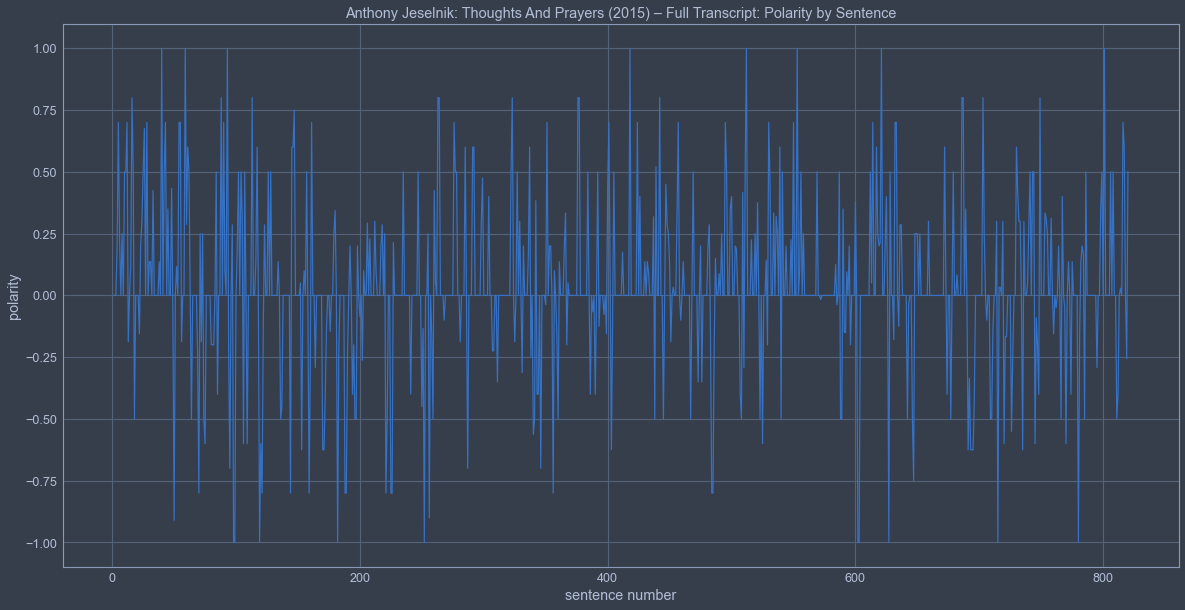

In [40]:
from jupyterthemes import jtplot
jtplot.style()

sent_polarity_dict = dict(zip(descriptions, sent_polarity))

show = 'Anthony Jeselnik: Thoughts And Prayers (2015) – Full Transcript'
show_pols = sent_polarity_dict[show]

fig, ax = plt.subplots(figsize = (20,10))
sns.lineplot(x = range(1, len(show_pols)+1), y = show_pols, ax = ax)
plt.title(f"{show}: Polarity by Sentence")
plt.xlabel("sentence number")
plt.ylabel("polarity");

### pickle metascripts update

In [43]:
with open("../data/metascripts_df_sentiment.pickle", 'wb') as file:
    pickle.dump(metascripts, file)

## sentiment analysis with BERT

# playground
[to the top](#Feature-Engineering-for-Standup-Scripts)